# Importando Bibliotecas e Funções

In [1]:
#importando módulos
import functions
from functions import *

import visualization
from visualization import *

In [2]:
#permitir auto-complete dos codigos com tab
%config Completer.use_jedi = True

#manipular dados
import pandas as pd
from pandas import json_normalize
import numpy as np
from ast import literal_eval

#requisicoes de API
import requests
import json

#manipular datas
import time
import datetime

#manipular strings
from unidecode import unidecode

#plotar e visualizar
import seaborn as sns
import matplotlib.pyplot as plt

#remover warnings
import warnings
warnings.simplefilter("ignore")

#aumentar display de linhas e colunas
pd.set_option('display.max_columns',250)

pd.set_option('display.min_rows',30)
pd.set_option('display.max_rows',30)

In [3]:
#caminho para as requisicoes
stream_req = 'https://v3.football.api-sports.io/fixtures?date='
fix_req = "https://v3.football.api-sports.io/fixtures?ids="
odds_req = 'https://v3.football.api-sports.io/odds?fixture='
pred_req = 'https://v3.football.api-sports.io/predictions?fixture='
hxh_req = 'https://v3.football.api-sports.io/fixtures/headtohead?h2h='

# 1. Request de Partidas Recentes, a Ocorrer ou Futuras
#### - Histórico de Confrontos, Previsões da API, Análises de Momento para Bets

## 1.1 Buscar as partidas que ainda ocorrerão

In [4]:
#cria um range de datas para +- X dias

from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')

#seleciona a range de datas
import datetime
x_dias_inicio = 0
x_dias_fim = 5

#date = hoje, datet0 = hoje - X dias, datet1 = hoje + X dias
datet0 = (datetime.date.today()) + datetime.timedelta(days=-x_dias_inicio)
datet1 = (datetime.date.today()) + datetime.timedelta(days=+x_dias_fim)

In [5]:
#escolher data inicio e fim - opcoes (date = hoje, datet0 = hoje - X dias, datet1 = hoje + X dias)

#data inicio
print(datet0)

#data fim
print(datet1)

#puxa as datas de inicio até a data fim
date_list = (pd.date_range(start=datet0, end=datet1,
                           freq='D')).strftime('%Y-%m-%d').tolist()
date_list

2023-05-01
2023-05-06


['2023-05-01',
 '2023-05-02',
 '2023-05-03',
 '2023-05-04',
 '2023-05-05',
 '2023-05-06']

In [6]:
df_stream = pd.concat([functions.req_padrao(stream_req,i) for i in date_list])

In [7]:
#verifica a quantidade de partidas por 'status'
print(df_stream.groupby(['fixture.status.long']).size())

#confere a quantidade de partidas que ainda não ocorreram
print(len(df_stream[df_stream['fixture.status.short']=='NS']))

fixture.status.long
Halftime                 7
Match Cancelled         24
Match Finished         129
Match Postponed         35
Not Started           2220
Second Half              4
Time to be defined     116
dtype: int64
2220


## 1.2 Selecionar Partida

In [8]:
#buscar partidas no país desejada
print('Digite o número referente a um país para visualizar as ligas com partidas nas datas selecionadas')
print(list(enumerate(df_stream['league.country'].unique())))
input_country_number = int(input())
country_name =  df_stream['league.country'].unique()[input_country_number]

partidas_stream_country = (df_stream[df_stream['league.country']==str(country_name)])

Digite o número referente a um país para visualizar as ligas com partidas nas datas selecionadas
[(0, 'Peru'), (1, 'Canada'), (2, 'Guinea'), (3, 'USA'), (4, 'Mexico'), (5, 'Chile'), (6, 'Nicaragua'), (7, 'Colombia'), (8, 'Hong-Kong'), (9, 'Bhutan'), (10, 'Belarus'), (11, 'Ukraine'), (12, 'Australia'), (13, 'Italy'), (14, 'Germany'), (15, 'England'), (16, 'Kenya'), (17, 'Russia'), (18, 'Estonia'), (19, 'China'), (20, 'Czech-Republic'), (21, 'Armenia'), (22, 'Belgium'), (23, 'Georgia'), (24, 'Bulgaria'), (25, 'Romania'), (26, 'Ethiopia'), (27, 'Sudan'), (28, 'Greece'), (29, 'Oman'), (30, 'South-Africa'), (31, 'Uganda'), (32, 'Norway'), (33, 'Sweden'), (34, 'Croatia'), (35, 'Finland'), (36, 'Slovakia'), (37, 'Zimbabwe'), (38, 'Azerbaidjan'), (39, 'Brazil'), (40, 'Austria'), (41, 'Ireland'), (42, 'Serbia'), (43, 'Spain'), (44, 'Portugal'), (45, 'Ghana'), (46, 'Poland'), (47, 'Hungary'), (48, 'Iceland'), (49, 'Bahrain'), (50, 'Bosnia'), (51, 'Israel'), (52, 'Cyprus'), (53, 'Saudi-Arabia'), 

In [9]:
#mostra todas as ligas para a selecao de partidas
print(list(enumerate(partidas_stream_country['league.name'].unique())))

#buscar partidas na liga desejada
print('Insira a liga desejada')
input_league_name = int(input())
league_name = partidas_stream_country['league.name'].unique()[input_league_name]

partidas_stream_country_league = partidas_stream_country.query("`league.name` == '" + league_name + "'")\
[['fixture.id','fixture.date','teams.home.name',\
  'teams.away.name','league.country']]

partidas_stream_country_league

[(0, 'Mineiro - 2'), (1, 'Serie B'), (2, 'Acreano'), (3, 'Serie A'), (4, 'Serie C'), (5, 'Roraimense'), (6, 'Paranaense - 2'), (7, 'Copa Verde'), (8, 'Copa do Nordeste'), (9, 'CBF Brasileiro U20'), (10, 'Brasileiro Women'), (11, 'Serie D'), (12, 'Gaúcho - 2'), (13, 'Rondoniense')]
Insira a liga desejada


,fixture.id,fixture.date,teams.home.name,teams.away.name,league.country
153,1006485,2023-05-01T19:00:00+00:00,Londrina,Criciuma,Brazil
121,1006477,2023-05-02T22:00:00+00:00,Ponte Preta,Botafogo SP,Brazil
122,1006486,2023-05-02T22:00:00+00:00,CRB,Sampaio Correa,Brazil
14,1006478,2023-05-03T00:30:00+00:00,Atletico Goianiense,Chapecoense-sc,Brazil
287,1006480,2023-05-03T22:00:00+00:00,Ituano,ABC,Brazil
288,1006481,2023-05-03T22:00:00+00:00,Mirassol,Novorizontino,Brazil
289,1006484,2023-05-03T22:00:00+00:00,Juventude,Guarani Campinas,Brazil
13,1006479,2023-05-04T00:15:00+00:00,Avai,Vila Nova,Brazil
86,1006490,2023-05-06T00:30:00+00:00,Botafogo SP,Vitoria,Brazil
1232,1006489,2023-05-06T19:00:00+00:00,Criciuma,Ituano,Brazil


In [10]:
# opção - selecionar o ID específico da partida para a qual se deseja ver as estatísticas

print('Insira o ID da Partida desejada')
print(list(enumerate(partidas_stream_country_league['fixture.id'])))
display(partidas_stream_country_league.reset_index(drop = True))
input_fixture = int(input())
input_fixture = partidas_stream_country_league['fixture.id'].unique()[input_fixture]


partidas_stream_country_league_fixture = df_stream\
.query("`fixture.id`=="+str(input_fixture))

print("\n ===== OUTPUT =====")
partidas_stream_country_league_fixture[['fixture.date','teams.home.name','teams.away.name']]

Insira o ID da Partida desejada
[(0, 1006485), (1, 1006477), (2, 1006486), (3, 1006478), (4, 1006480), (5, 1006481), (6, 1006484), (7, 1006479), (8, 1006490), (9, 1006489), (10, 1006493), (11, 1006495)]


,fixture.id,fixture.date,teams.home.name,teams.away.name,league.country
0,1006485,2023-05-01T19:00:00+00:00,Londrina,Criciuma,Brazil
1,1006477,2023-05-02T22:00:00+00:00,Ponte Preta,Botafogo SP,Brazil
2,1006486,2023-05-02T22:00:00+00:00,CRB,Sampaio Correa,Brazil
3,1006478,2023-05-03T00:30:00+00:00,Atletico Goianiense,Chapecoense-sc,Brazil
4,1006480,2023-05-03T22:00:00+00:00,Ituano,ABC,Brazil
5,1006481,2023-05-03T22:00:00+00:00,Mirassol,Novorizontino,Brazil
6,1006484,2023-05-03T22:00:00+00:00,Juventude,Guarani Campinas,Brazil
7,1006479,2023-05-04T00:15:00+00:00,Avai,Vila Nova,Brazil
8,1006490,2023-05-06T00:30:00+00:00,Botafogo SP,Vitoria,Brazil
9,1006489,2023-05-06T19:00:00+00:00,Criciuma,Ituano,Brazil



 ===== OUTPUT =====


,fixture.date,teams.home.name,teams.away.name
121,2023-05-02T22:00:00+00:00,Ponte Preta,Botafogo SP


In [11]:
#Abreviar o objeto para as próximas etapas
psclf = partidas_stream_country_league_fixture.copy()
psclf

,fixture.id,fixture.referee,fixture.timezone,fixture.date,fixture.timestamp,fixture.periods.first,fixture.periods.second,fixture.venue.id,fixture.venue.name,fixture.venue.city,fixture.status.long,fixture.status.short,fixture.status.elapsed,league.id,league.name,league.country,league.logo,league.flag,league.season,league.round,teams.home.id,teams.home.name,teams.home.logo,teams.home.winner,teams.away.id,teams.away.name,teams.away.logo,teams.away.winner,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away
121,1006477,None,UTC,2023-05-02T22:00:00+00:00,1683064800,None,None,261.0,Estádio Moisés Lucarelli,"Campinas, São Paulo",Not Started,NS,None,72,Serie B,Brazil,https://media-1.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/br.svg,2023,Regular Season - 4,139,Ponte Preta,https://media-1.api-sports.io/football/teams/1...,None,2618,Botafogo SP,https://media-2.api-sports.io/football/teams/2...,None,None,None,None,None,None,None,None,None,None,None


## 1.3 Buscar todas as estatísticas de confrontos anteriores

In [12]:
#busca o id dos times que se enfrentarão e coloca no formato 'id1-id2' para fazer a requisição HeadxHead
hxh_list = (psclf['teams.home.id']).astype(str) + '-' + (psclf['teams.away.id']).astype(str)
hxh_list = list(hxh_list)

hxh_fixture = list(psclf['fixture.id'])

In [13]:
#faz a requisição dos confrontos anteriores entre os times que irão jogar
hxh_stats = pd.concat([req_hxh(hxh_req,i,j) for i,j in zip(hxh_list, hxh_fixture)]).reset_index(drop =  True)

In [14]:
#cria lista de ids dos conflitos que servirá para iteração
hxh_stats_list = list(hxh_stats['fixture.id'])

In [15]:
#confere o tamanho
print("Quantidade de Confrontos anteriores entre os 2 Times")
print(len(hxh_stats_list))

Quantidade de Confrontos anteriores entre os 2 Times
10


In [16]:
#cria a variável 'resultado', indicando se foi vitória do time da casa, empate ou vitória do visitante
hxh_stats['resultado'] = np.where(hxh_stats['teams.away.winner']==False,\
'Hw',np.where(hxh_stats['teams.away.winner']==True,'Aw','D'))

In [17]:
#faz a requisição dos dados das partidas - estatisticas gerais, jogadores, lineups e eventos
df_stats = pd.concat([req_padrao(fix_req,i) for i in hxh_stats_list]).sort_values(by = 'fixture.date')

In [18]:
df_stats

,events,lineups,statistics,players,fixture.id,fixture.referee,fixture.timezone,fixture.date,fixture.timestamp,fixture.periods.first,fixture.periods.second,fixture.venue.id,fixture.venue.name,fixture.venue.city,fixture.status.long,fixture.status.short,fixture.status.elapsed,league.id,league.name,league.country,league.logo,league.flag,league.season,league.round,teams.home.id,teams.home.name,teams.home.logo,teams.home.winner,teams.away.id,teams.away.name,teams.away.logo,teams.away.winner,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away
0,"[{'time': {'elapsed': 27, 'extra': None}, 'tea...","[{'team': {'id': 139, 'name': 'Ponte Preta', '...","[{'team': {'id': 139, 'name': 'Ponte Preta', '...","[{'team': {'id': 139, 'name': 'Ponte Preta', '...",94919,Felipe Fernandes de Lima,UTC,2019-06-08T00:30:00+00:00,1559953800,1559953800,1559957400,None,Moisés Lucarelli,Campinas,Match Finished,FT,90,72,Serie B,Brazil,https://media-3.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/br.svg,2019,Regular Season - 7,139,Ponte Preta,https://media-2.api-sports.io/football/teams/1...,None,2618,Botafogo SP,https://media-3.api-sports.io/football/teams/2...,None,0,0,0,0,0,0,None,None,None,None
0,"[{'time': {'elapsed': 3, 'extra': None}, 'team...","[{'team': {'id': 2618, 'name': 'Botafogo SP', ...","[{'team': {'id': 2618, 'name': 'Botafogo SP', ...","[{'team': {'id': 2618, 'name': 'Botafogo SP', ...",95102,Edina Alves Batista,UTC,2019-10-05T14:00:00+00:00,1570284000,1570284000,1570287600,None,Estadio Santa Cruz,Ribeirao Preto,Match Finished,FT,90,72,Serie B,Brazil,https://media-1.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/br.svg,2019,Regular Season - 26,2618,Botafogo SP,https://media-3.api-sports.io/football/teams/2...,True,139,Ponte Preta,https://media-3.api-sports.io/football/teams/1...,False,4,1,3,0,4,1,None,None,None,None
0,"[{'time': {'elapsed': 20, 'extra': None}, 'tea...","[{'team': {'id': 2618, 'name': 'Botafogo SP', ...","[{'team': {'id': 2618, 'name': 'Botafogo SP', ...","[{'team': {'id': 2618, 'name': 'Botafogo SP', ...",317872,Jose Claudio Rocha Filho,UTC,2020-01-26T19:00:00+00:00,1580065200,1580065200,1580068800,219,Estádio Santa Cruz,"Ribeirão Preto, São Paulo",Match Finished,FT,90,475,Paulista - A1,Brazil,https://media-2.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/br.svg,2020,Regular Season - 2,2618,Botafogo SP,https://media-2.api-sports.io/football/teams/2...,False,139,Ponte Preta,https://media-3.api-sports.io/football/teams/1...,True,0,1,0,0,0,1,None,None,None,None
0,"[{'time': {'elapsed': 14, 'extra': None}, 'tea...","[{'team': {'id': 139, 'name': 'Ponte Preta', '...","[{'team': {'id': 139, 'name': 'Ponte Preta', '...","[{'team': {'id': 139, 'name': 'Ponte Preta', '...",328438,Thiago Luis Scarascati,UTC,2020-09-05T00:30:00+00:00,1599265800,1599265800,1599269400,261,Estádio Moisés Lucarelli,"Campinas, São Paulo",Match Finished,FT,90,72,Serie B,Brazil,https://media-3.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/br.svg,2020,Regular Season - 8,139,Ponte Preta,https://media-3.api-sports.io/football/teams/1...,True,2618,Botafogo SP,https://media-1.api-sports.io/football/teams/2...,False,1,0,0,0,1,0,None,None,None,None
0,"[{'time': {'elapsed': 7, 'extra': None}, 'team...","[{'team': {'id': 2618, 'name': 'Botafogo SP', ...","[{'team': {'id': 2618, 'name': 'Botafogo SP', ...","[{'team': {'id': 2618, 'name': 'Botafogo SP', ...",328629,Rodrigo Carvalhaes de Miranda,UTC,2020-12-08T22:15:00+00:00,1607465700,1607465700,1607469300,219,Estádio Santa Cruz,"Ribeirão Preto, São Paulo",Match Finished,FT,90,72,Serie B,Brazil,https://media-1.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/br.svg,2020,Regular Season - 27,2618,Botafogo SP,https://media-1.api-sports.io/football/teams/2...,True,139,Ponte Preta,http

In [19]:
#aplica a função para extrair as informações dos campos statisticas, players e lineups
df_stats_complete = functions.transform_fixture(df_stats)

In [20]:
#dobra o tamanho dataframe de HeadxHead dos times que se enfrentarão, dividindo os jogos em 1 linha por time
hxh_home = hxh_stats.copy()
hxh_home['team.id'] = hxh_home['teams.home.id']

hxh_away = hxh_stats.copy()
hxh_away['team.id'] = hxh_away['teams.away.id']

hxh_concat = pd.concat([hxh_home,hxh_away]).sort_values(by = 'fixture.date')

hxh_concat.tail()

,fixture.id,fixture.referee,fixture.timezone,fixture.date,fixture.timestamp,fixture.periods.first,fixture.periods.second,fixture.venue.id,fixture.venue.name,fixture.venue.city,fixture.status.long,fixture.status.short,fixture.status.elapsed,league.id,league.name,league.country,league.logo,league.flag,league.season,league.round,teams.home.id,teams.home.name,teams.home.logo,teams.home.winner,teams.away.id,teams.away.name,teams.away.logo,teams.away.winner,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away,fixture.id.ns,resultado,team.id
3,814386,Luiz Flavio De Oliveira,UTC,2022-02-16T22:00:00+00:00,1645048800,1.645049e+09,1.645052e+09,261.0,Estádio Moisés Lucarelli,"Campinas, São Paulo",Match Finished,FT,90.0,475,Paulista - A1,Brazil,https://media-3.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/br.svg,2022,Regular Season - 7,139,Ponte Preta,https://media-3.api-sports.io/football/teams/1...,False,2618,Botafogo SP,https://media-3.api-sports.io/football/teams/2...,True,0.0,1.0,0.0,0.0,0.0,1.0,None,None,NaN,NaN,1006477,Aw,2618
4,1006477,None,UTC,2023-05-02T22:00:00+00:00,1683064800,NaN,NaN,261.0,Estádio Moisés Lucarelli,"Campinas, São Paulo",Not Started,NS,NaN,72,Serie B,Brazil,https://media-3.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/br.svg,2023,Regular Season - 4,139,Ponte Preta,https://media-2.api-sports.io/football/teams/1...,None,2618,Botafogo SP,https://media-1.api-sports.io/football/teams/2...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,1006477,D,139
4,1006477,None,UTC,2023-05-02T22:00:00+00:00,1683064800,NaN,NaN,261.0,Estádio Moisés Lucarelli,"Campinas, São Paulo",Not Started,NS,NaN,72,Serie B,Brazil,https://media-3.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/br.svg,2023,Regular Season - 4,139,Ponte Preta,https://media-2.api-sports.io/football/teams/1...,None,2618,Botafogo SP,https://media-1.api-sports.io/football/teams/2...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,1006477,D,2618
9,1006670,None,UTC,2023-08-08T00:00:00+00:00,1691452800,NaN,NaN,219.0,Estádio Santa Cruz,"Ribeirão Preto, São Paulo",Time to be defined,TBD,NaN,72,Serie B,Brazil,https://media-3.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/br.svg,2023,Regular Season - 23,2618,Botafogo SP,https://media-3.api-sports.io/football/teams/2...,None,139,Ponte Preta,https://media-3.api-sports.io/football/teams/1...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,1006477,D,2618
9,1006670,None,UTC,2023-08-08T00:00:00+00:00,1691452800,NaN,NaN,219.0,Estádio Santa Cruz,"Ribeirão Preto, São Paulo",Time to be defined,TBD,NaN,72,Serie B,Brazil,https://media-3.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/br.svg,2023,Regular Season - 23,2618,Botafogo SP,https://media-3.api-sports.io/football/teams/2...,None,139,Ponte Preta,https://media-3.api-sports.io/football/teams/1...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,1006477,D,139


In [21]:
#faz um merge com os dados de estatísticas gerais, jogadores e formation
 #o intuito e unir as informações de cada time com sua respectiva linha

hxh_complete = \
hxh_concat.merge(df_stats_complete[3], on=['fixture.id', 'team.id'], how='left')\
.merge(df_stats_complete[2], on=['fixture.id', 'team.id', 'team.name'],how='left')\
.merge(df_stats_complete[1],on=['fixture.id', 'team.id', 'team.name','team.logo'],how='left')

hxh_complete

,fixture.id,fixture.referee,fixture.timezone,fixture.date,fixture.timestamp,fixture.periods.first,fixture.periods.second,fixture.venue.id,fixture.venue.name,fixture.venue.city,fixture.status.long,fixture.status.short,fixture.status.elapsed,league.id,league.name,league.country,league.logo,league.flag,league.season,league.round,teams.home.id,teams.home.name,teams.home.logo,teams.home.winner,teams.away.id,teams.away.name,teams.away.logo,teams.away.winner,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away,fixture.id.ns,resultado,team.id,team.name,team.logo,Ball Possession,Blocked Shots,Corner Kicks,Fouls,Goalkeeper Saves,Offsides,Passes %,Passes accurate,Red Cards,Shots insidebox,Shots off Goal,Shots on Goal,Shots outsidebox,Total Shots,Total passes,Yellow Cards,statistics.offsides,statistics.shots.total,statistics.shots.on,statistics.goals.total,statistics.goals.conceded,statistics.goals.assists,statistics.goals.saves,statistics.passes.total,statistics.passes.key,statistics.passes.accuracy,statistics.tackles.total,statistics.tackles.blocks,statistics.tackles.interceptions,statistics.duels.total,statistics.duels.won,statistics.dribbles.attempts,statistics.dribbles.success,statistics.dribbles.past,statistics.fouls.drawn,statistics.fouls.committed,statistics.cards.yellow,statistics.cards.red,statistics.penalty.won,statistics.penalty.commited,statistics.penalty.scored,statistics.penalty.missed,statistics.penalty.saved,statistics.games.rating,statistics.games.rating.D,statistics.games.rating.F,statistics.games.rating.M,formation,startXI,substitutes,team.colors,coach.id,coach.name,coach.photo,team.colors.player.primary,team.colors.player.number,team.colors.player.border,team.colors.goalkeeper.primary,team.colors.goalkeeper.number,team.colors.goalkeeper.border
0,94919,Felipe Fernandes de Lima,UTC,2019-06-08T00:30:00+00:00,1559953800,1.559954e+09,1.559957e+09,NaN,Moisés Lucarelli,Campinas,Match Finished,FT,90.0,72,Serie B,Brazil,https://media-2.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/br.svg,2019,Regular Season - 7,139,Ponte Preta,https://media-1.api-sports.io/football/teams/1...,None,2618,Botafogo SP,https://media-3.api-sports.io/football/teams/2...,None,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN,1006477,D,139,Ponte Preta,https://media-1.api-sports.io/football/teams/1...,59.0,1.0,6.0,19.0,2.0,1.0,78.0,311.0,NaN,8.0,10.0,2.0,5.0,13.0,398.0,1.0,0.0,13.0,2.0,0.0,0.0,0.0,2.0,311.0,8.0,66.785714,11.0,3.0,14.0,120.0,65.0,11.0,7.0,6.0,26.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.964286,7.360000,6.60,6.762500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,94919,Felipe Fernandes de Lima,UTC,2019-06-08T00:30:00+00:00,1559953800,1.559954e+09,1.559957e+09,NaN,Moisés Lucarelli,Campinas,Match Finished,FT,90.0,72,Serie B,Brazil,https://media-2.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/br.svg,2019,Regular Season - 7,139,Ponte Preta,https://media-1.api-sports.io/football/teams/1...,None,2618,Botafogo SP,https://media-3.api-sports.io/football/teams/2...,None,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN,1006477,D,2618,Botafogo SP,https://media-3.api-sports.io/football/teams/2...,41.0,3.0,5.0,28.0,2.0,2.0,67.0,179.0,NaN,6.0,9.0,2.0,8.0,14.0,266.0,2.0,0.0,14.0,2.0,0.0,0.0,0.0,2.0,179.0,11.0,63.857143,8.0,1.0,10.0,117.0,54.0,7.0,6.0,7.0,19.0,28.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6.814286,6.950000,6.65,6.733333,4-2-3-1,"[{'player': {'id': 9193, 'name': 'Darley', 'nu...","[{'player': {'id': 9207, 'name': 'Nadson', 'nu...",None,212.0,Roberto Cavalo,https://media-3.api-sports.io/football/coachs/...,NaN,NaN,NaN,NaN,NaN,NaN
2,95102,Edina Alves Batista,UTC,2019-10-05T14:00:00+00:00,1570284000,1.570284e+09,1.570288e+09,NaN,Estadio Santa Cruz,Ribeirao Preto,Match Finished,FT,90.0,72,Serie B,Brazil,https://media-2.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/br.svg,

In [22]:
#cria uma variável 'wdl' indicando se o time daquela linha ganhou (W), perdeu (L) ou empatou (D) para cada confronto anterior

hxh_complete['wdl'] = np.where(
    (hxh_complete['teams.away.winner'] == True) &
    (hxh_complete['team.id'] == hxh_complete['teams.away.id']), 'W',
    np.where((hxh_complete['teams.home.winner'] == True) &
             (hxh_complete['team.id'] == hxh_complete['teams.home.id']), 'W',
             np.where((hxh_complete['teams.home.winner'] == False) &
                      (hxh_complete['team.id'] == hxh_complete['teams.home.id']), 'L',
                      np.where((hxh_complete['teams.away.winner'] == False) &
                               (hxh_complete['team.id'] == hxh_complete['teams.away.id']), 'L',
                               'D'))))

In [23]:
#cria uma variável 'gols' indicando quantos gols o time daquela linha fez na partida

hxh_complete['gols'] = np.where((hxh_complete['teams.home.id'] == hxh_complete['team.id']),
                        hxh_complete['score.fulltime.home'],
                        np.where((hxh_complete['teams.away.id'] == hxh_complete['team.id']),
                                 hxh_complete['score.fulltime.away'], np.nan)).astype('float')

In [24]:
#filtra, do dataframe de confrontos, apenas aqueles que já ocorreram

hxh_complete = hxh_complete[(hxh_complete['fixture.status.short']!='NS') & (hxh_complete['fixture.status.short']!='TBD')]

In [25]:
#filtra apenas as colunas relevantes para analise dos confrontos

hxh_complete = hxh_complete.filter(['fixture.id','fixture.date','fixture.venue.id','fixture.status.long','fixture.status.short','fixture.status.elapsed','league.id',
 'league.name','league.country','league.logo','league.flag','league.season','league.round','teams.home.id','teams.home.name','teams.home.logo','teams.home.winner','teams.away.id',
 'teams.away.name','teams.away.logo','teams.away.winner','gols','score.penalty.home','score.penalty.away','fixture.id.ns','resultado','team.id','team.name','team.logo','Ball Possession',
 'Blocked Shots','Corner Kicks','Fouls','Goalkeeper Saves','Offsides','Passes %','Passes accurate','Red Cards','Shots insidebox','Shots off Goal','Shots on Goal','Shots outsidebox',
 'Total Shots','Total passes','Yellow Cards','statistics.offsides','statistics.shots.total','statistics.shots.on','statistics.goals.total','statistics.goals.conceded','statistics.goals.assists',
 'statistics.goals.saves','statistics.passes.total','statistics.passes.key','statistics.passes.accuracy','statistics.tackles.total','statistics.tackles.blocks','statistics.tackles.interceptions',
 'statistics.duels.total','statistics.duels.won','statistics.dribbles.attempts','statistics.dribbles.success','statistics.dribbles.past','statistics.fouls.drawn','statistics.fouls.committed',
 'statistics.cards.yellow','statistics.cards.red','statistics.penalty.won','statistics.penalty.commited','statistics.penalty.scored','statistics.penalty.missed','statistics.penalty.saved',
 'statistics.games.rating','statistics.games.rating.D','statistics.games.rating.F','statistics.games.rating.M','formation','startXI','substitutes','coach.id',
 'coach.name','coach.photo','wdl'])

In [26]:
#faz uma iteração pelo histórico de conflitos
    #retorna as estatísticas das partidas anteriores
        #agregadas
        #divididas pela quantia de gols de cada time
        #divididas pela quantidade de partidas
c = []

confronto = hxh_complete.sort_values(
    by='fixture.date').dropna(subset='fixture.status.elapsed').tail(10)
confronto_gp = confronto.groupby(['team.id',
                        'wdl']).size().to_frame().reset_index()

# agrupa os resultados por equipe e WDL, somando os valores
grouped = confronto_gp.groupby(['team.id', 'wdl']).sum()

# reorganiza os dados em uma tabela pivô, com colunas para W, D e L
pivoted = grouped.pivot_table(index='team.id',
                              columns='wdl',
                              values=0,
                              fill_value=0)

# remove o nome das colunas e reorganiza a ordem das colunas
if 'W' in pivoted.columns:
    pass  # do nothing
else:
    pivoted.loc[:, 'W'] = 0

if 'D' in pivoted.columns:
    pass  # do nothing
else:
    pivoted.loc[:, 'D'] = 0

if 'L' in pivoted.columns:
    pass  # do nothing
else:
    pivoted.loc[:, 'L'] = 0

# reorganiza as linhas pelo ID da equipe
wdl = pivoted.reset_index().sort_values('team.id')

gols = confronto.groupby('team.id')['gols'].sum().to_frame().astype(
    float).reset_index()

agg = confronto.groupby('team.id').sum().iloc[:, 5:].drop(columns=['fixture.id.ns'])

pergame = agg.reset_index().copy().set_index('team.id')
pergame.iloc[:, :] = pergame.iloc[:, :].div(
    confronto_gp.groupby('team.id').sum().values, axis=0)
pergame.columns = [str(col) + '.pergame' for col in pergame.columns]
pergame = pergame.reset_index()

pergols = agg.reset_index().set_index('team.id')
pergols.iloc[:, :] = pergols.iloc[:, :].div(pergols.gols, axis=0)
pergols.columns = [str(col) + '.pergols' for col in pergols.columns]
pergols = pergols.reset_index().drop(columns = 'gols.pergols')

agg.columns = [str(col) + '.agg' for col in agg.columns]
agg = agg.reset_index()

form = confronto.groupby('team.id')['formation'].nunique().reset_index(
).rename(columns={'formation': 'form_cont'})

qthxh = confronto_gp.groupby('team.id',
                   as_index=False).sum().rename(columns={0: 'qt.hxh'})

conf = wdl.merge(gols, how='left').merge(agg, how='left').merge(pergame, how='left').merge(
        pergols, how='left', on = 'team.id').merge(form, how='left').merge(qthxh,
                                                           how='left')
c.append(conf)
        
df_confronto = pd.concat(c)

In [27]:
#Remove colunas residuais das ultimas transformacoes, que nao fazem sentido para analise
 #como a o agregado da posse de bola dos times
    #afinal, nao faz sentido somar porcentagens de 0 a 100
prefixes_to_drop = [
'teams.home.id.agg',
'teams.away.id.agg',                             
"goals.",
"Ball Possession.agg",
"Passes %.agg",
"score.",
"statistics.cards",
"statistics.fouls",
"statistics.games.rating.agg",
"statistics.games.rating.D.agg",
"statistics.games.rating.D.pergols",
"statistics.games.rating.pergols",
"statistics.games.rating.F.agg",
"statistics.games.rating.M.agg",                   
"statistics.games.rating.F.pergols",
"statistics.games.rating.M.pergols",
"statistics.passes.accuracy.agg"
"statistics.goals",
"statistics.offsides",
"statistics.shots.",
"gols.agg",
'Passes %.pergols']

cols_to_drop = [col for col in df_confronto.columns if col.startswith(tuple(prefixes_to_drop))]
# Drop the columns from the dataframe
df_confronto = df_confronto.drop(columns=cols_to_drop)

In [28]:
#dobra o tamanho dataframe, dividindo os jogos em 1 linha por time

psclf_home = psclf.copy()
psclf_home['team.id'] = psclf_home['teams.home.id']

psclf_away = psclf.copy()
psclf_away['team.id'] = psclf_away['teams.away.id']

psclf_concat = pd.concat([psclf_home,psclf_away]).sort_values(by = 'fixture.date')

In [29]:
#faz um merge das estatisticas produzidas acima com a base anterior, das partidas

df_confronto = psclf_concat[[
    'fixture.id', 'fixture.date', 'fixture.status.long', 'league.id',
    'league.name', 'league.country', 'league.season', 'league.round',
    'teams.home.id', 'teams.home.name', 'teams.home.logo', 'teams.away.id',
    'teams.away.name', 'teams.away.logo', 'team.id'
]].merge(df_confronto, how = 'left')

In [30]:
#visualiza os dados
df_confronto.sort_values(by = 'fixture.id', ascending = False).T

,0,1
fixture.id,1006477,1006477
fixture.date,2023-05-02T22:00:00+00:00,2023-05-02T22:00:00+00:00
fixture.status.long,Not Started,Not Started
league.id,72,72
league.name,Serie B,Serie B
league.country,Brazil,Brazil
league.season,2023,2023
league.round,Regular Season - 4,Regular Season - 4
teams.home.id,139,139
teams.home.name,Ponte Preta,Ponte Preta


## 1.4 Odds do Confronto Futuro

In [31]:
#faz a requisição das odds oferecidas para a partida
odds_confronto = pd.concat([req_padrao(stream_req,i) for i in psclf['fixture.id']])

In [32]:
odds_confronto

""


In [33]:
odds_confronto_list = []

#da parse no json, transforma as odds em formato long e cria a coluna fixture.id para possibilitar merge

if len(odds_confronto)>0:
    for i,j in zip(range(len(odds_confronto)),odds_confronto['fixture.id']):

        odds_open = json_normalize((cf_odds.iloc[i,:])['bookmakers'])
        odds_open = flatten_nested_json_df(odds_open.explode('bets'))
        odds_open = odds_open[odds_open['bets.name'] == 'Match Winner']
        odds_open = odds_open[(odds_open['name']=='Bet365') | (odds_open['name']=='Sportingbet')]
        odds_open = odds_open.pivot_table(index='name',
                        columns='bets.values.value',
                        values='bets.values.odd').stack().to_frame().reset_index()
        odds_open['bet'] = odds_open['name'] + odds_open['bets.values.value']
        odds_open = odds_open[['bet',0]].set_index('bet').T.iloc[:,:]
        odds_open['fixture.id'] = j
        odds_confronto_list.append(odds_open)

    df_odds = pd.concat(odds_list)

else:
    df_odds = pd.DataFrame({'fixture.id':[np.nan]})

In [34]:
df_odds

,fixture.id
0,NaN


In [35]:
#merge da base de confrontos com as odds
df_confronto = df_confronto.merge(df_odds, how = 'left')

## 1.5 Previsões da API

In [36]:
psclf

,fixture.id,fixture.referee,fixture.timezone,fixture.date,fixture.timestamp,fixture.periods.first,fixture.periods.second,fixture.venue.id,fixture.venue.name,fixture.venue.city,fixture.status.long,fixture.status.short,fixture.status.elapsed,league.id,league.name,league.country,league.logo,league.flag,league.season,league.round,teams.home.id,teams.home.name,teams.home.logo,teams.home.winner,teams.away.id,teams.away.name,teams.away.logo,teams.away.winner,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away
121,1006477,None,UTC,2023-05-02T22:00:00+00:00,1683064800,None,None,261.0,Estádio Moisés Lucarelli,"Campinas, São Paulo",Not Started,NS,None,72,Serie B,Brazil,https://media-1.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/br.svg,2023,Regular Season - 4,139,Ponte Preta,https://media-1.api-sports.io/football/teams/1...,None,2618,Botafogo SP,https://media-2.api-sports.io/football/teams/2...,None,None,None,None,None,None,None,None,None,None,None


In [37]:
predictions = pd.concat([req_alt(pred_req,i) for i in psclf['fixture.id']])

In [38]:
#divisao das estatisticas fornecidas nas previsoes em time .home e .away

#coloca em index as variaveis comuns a ambos
df_predictions = predictions.set_index([
    'predictions.winner.id', 'predictions.winner.name',
    'predictions.winner.comment', 'predictions.win_or_draw',
    'predictions.under_over'
])

#guarda o dataframe em outro objeto que será utilizado na visualização de radar
predictions_viz = df_predictions.copy()

#separa as variaveis referentes ao time .away
df_pred_away = df_predictions.filter([i for i in df_predictions.columns if 'away.' in i] + [
    'fixture.id',
    'comparison.form.away',
    'comparison.att.away',
    'comparison.def.away',
    'comparison.poisson_distribution.away',
    'comparison.h2h.away',
    'comparison.goals.away',
    'comparison.total.away',
]).reset_index().rename(columns={'teams.away.id': 'team.id'})

df_pred_away.columns = df_pred_away.columns.str.replace('away.', '')

#separa as variaveis referentes ao time .home
df_pred_home = df_predictions.filter([i for i in df_predictions.columns if 'home.' in i] + [
    'fixture.id',
    'comparison.form.home',
    'comparison.att.home',
    'comparison.def.home',
    'comparison.poisson_distribution.home',
    'comparison.h2h.home',
    'comparison.goals.home',
    'comparison.total.home',
]).reset_index().rename(columns={'teams.home.id': 'team.id'})

df_pred_home.columns = df_pred_home.columns.str.replace('home.', '')



<function matplotlib.pyplot.show(close=None, block=None)>

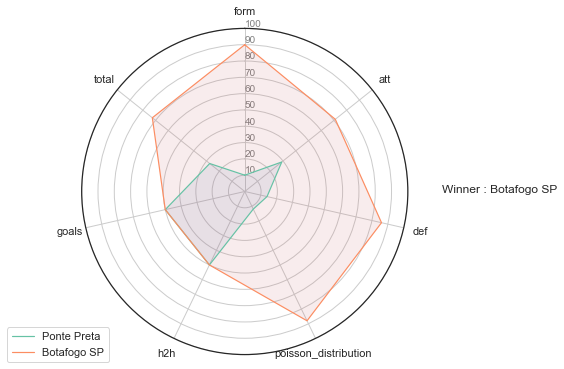

In [39]:
#Visualização dos dados do confronto - no caso de 1 partida selecionada
viz_radar(predictions_viz) 

In [40]:
# Substituindo '.home' por '' apenas nas colunas que contêm a palavra 'comparison'
cols_to_replace_h = [col for col in df_pred_home.columns if 'comparison' in col]
cols_to_replace_a = [col for col in df_pred_away.columns if 'comparison' in col]
df_pred_home.rename(columns={col: col.replace('.home', '') for col in cols_to_replace_h}, inplace=True)
df_pred_away.rename(columns={col: col.replace('.away', '') for col in cols_to_replace_a}, inplace=True)

In [41]:
#concatena as informacoes de home e away novamente, de forma a termos 2 linhas, uma para cada time
df_predictions = pd.concat([df_pred_home,df_pred_away])

In [42]:
#concatena as informacoes com os dados de confrontos
df_predictions[['fixture.id','team.id']] =\
df_predictions[['fixture.id','team.id']].astype(int)

df_confronto = df_confronto.merge(df_predictions[['fixture.id','team.id','teams.name']], on = ['fixture.id','team.id'], how = 'left')

#remove o simbolo de porcentagem das colunas numéricas
df_confronto = df_confronto.replace({'%':''}, regex = True)

In [43]:
#resultado final
df_confronto

,fixture.id,fixture.date,fixture.status.long,league.id,league.name,league.country,league.season,league.round,teams.home.id,teams.home.name,teams.home.logo,teams.away.id,teams.away.name,teams.away.logo,team.id,L,W,D,gols,Blocked Shots.agg,Corner Kicks.agg,Fouls.agg,Goalkeeper Saves.agg,Offsides.agg,Passes accurate.agg,Red Cards.agg,Shots insidebox.agg,Shots off Goal.agg,Shots on Goal.agg,Shots outsidebox.agg,Total Shots.agg,Total passes.agg,Yellow Cards.agg,statistics.goals.total.agg,statistics.goals.conceded.agg,statistics.goals.assists.agg,statistics.goals.saves.agg,statistics.passes.total.agg,statistics.passes.key.agg,statistics.passes.accuracy.agg,statistics.tackles.total.agg,statistics.tackles.blocks.agg,statistics.tackles.interceptions.agg,statistics.duels.total.agg,statistics.duels.won.agg,statistics.dribbles.attempts.agg,statistics.dribbles.success.agg,statistics.dribbles.past.agg,statistics.penalty.won.agg,statistics.penalty.commited.agg,statistics.penalty.scored.agg,statistics.penalty.missed.agg,statistics.penalty.saved.agg,coach.id.agg,teams.home.id.pergame,teams.away.id.pergame,gols.pergame,Ball Possession.pergame,Blocked Shots.pergame,Corner Kicks.pergame,Fouls.pergame,Goalkeeper Saves.pergame,Offsides.pergame,Passes %.pergame,Passes accurate.pergame,Red Cards.pergame,Shots insidebox.pergame,Shots off Goal.pergame,Shots on Goal.pergame,Shots outsidebox.pergame,Total Shots.pergame,Total passes.pergame,Yellow Cards.pergame,statistics.goals.total.pergame,statistics.goals.conceded.pergame,statistics.goals.assists.pergame,statistics.goals.saves.pergame,statistics.passes.total.pergame,statistics.passes.key.pergame,statistics.passes.accuracy.pergame,statistics.tackles.total.pergame,statistics.tackles.blocks.pergame,statistics.tackles.interceptions.pergame,statistics.duels.total.pergame,statistics.duels.won.pergame,statistics.dribbles.attempts.pergame,statistics.dribbles.success.pergame,statistics.dribbles.past.pergame,statistics.penalty.won.pergame,statistics.penalty.commited.pergame,statistics.penalty.scored.pergame,statistics.penalty.missed.pergame,statistics.penalty.saved.pergame,statistics.games.rating.pergame,statistics.games.rating.D.pergame,statistics.games.rating.F.pergame,statistics.games.rating.M.pergame,coach.id.pergame,teams.home.id.pergols,teams.away.id.pergols,Ball Possession.pergols,Blocked Shots.pergols,Corner Kicks.pergols,Fouls.pergols,Goalkeeper Saves.pergols,Offsides.pergols,Passes accurate.pergols,Red Cards.pergols,Shots insidebox.pergols,Shots off Goal.pergols,Shots on Goal.pergols,Shots outsidebox.pergols,Total Shots.pergols,Total passes.pergols,Yellow Cards.pergols,statistics.goals.total.pergols,statistics.goals.conceded.pergols,statistics.goals.assists.pergols,statistics.goals.saves.pergols,statistics.passes.total.pergols,statistics.passes.key.pergols,statistics.passes.accuracy.pergols,statistics.tackles.total.pergols,statistics.tackles.blocks.pergols,statistics.tackles.interceptions.pergols,statistics.duels.total.pergols,statistics.duels.won.pergols,statistics.dribbles.attempts.pergols,statistics.dribbles.success.pergols,statistics.dribbles.past.pergols,statistics.penalty.won.pergols,statistics.penalty.commited.pergols,statistics.penalty.scored.pergols,statistics.penalty.missed.pergols,statistics.penalty.saved.pergols,coach.id.pergols,form_cont,qt.hxh,teams.name
0,1006477,2023-05-02T22:00:00+00:00,Not Started,72,Serie B,Brazil,2023,Regular Season - 4,139,Ponte Preta,https://media-1.api-sports.io/football/teams/1...,2618,Botafogo SP,https://media-2.api-sports.io/football/teams/2...,139,2,3,0,3.0,7.0,19.0,52.0,8.0,6.0,1172.0,1.0,25.0,28.0,9.0,19.0,44.0,1392.0,6.0,1.0,3.0,1.0,8.0,1392.0,35.0,84.848718,46.0,12.0,29.0,351.0,156.0,44.0,17.0,28.0,0.0,0.0,0.0,0.0,0.0,2851.0,1130.6,1626.4,0.6,36.4,1.4,3.8,10.4,1.6,1.2,50.0,234.4,0.2,5.0,5.6,1.8,3.8,8.8,278.4,1.2,0.2,0.6,0.2,1.6,278.4,7.0,16.969744,9.2,2.4,5.8,70.2,31.2,8.8,3.4,5.6,0.0,0.0,0.0,0.0,0.0,4.113833,4.215333,4.048,4.050667,570.2,1884.333333,2710

## 1.6 Visualização dos Resultados

<function matplotlib.pyplot.show(close=None, block=None)>

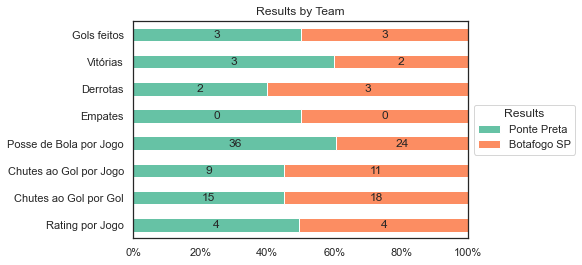

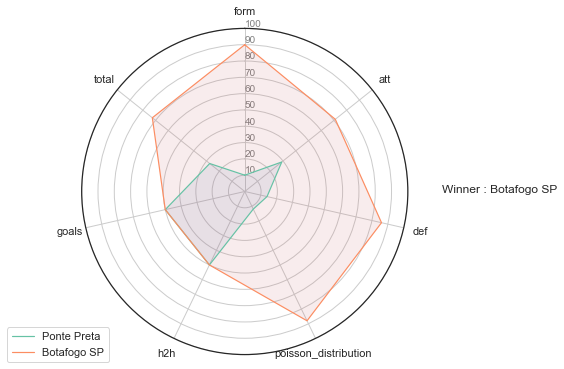

In [44]:
#visualização dos resultados
viz_stacked(df_confronto)
viz_radar(predictions_viz)